# Setting the Wheels in Motion: Introduction and Objectives
Welcome to the Cyclistic Bikeshare Data Analysis project. This notebook documents the step-by-step process of analysing and understanding Cyclistic’s bikeshare usage trends using SQL (PostgreSQL) and Tableau. The goal of this project is to clean, transform, and normalise raw trip data to uncover key insights about user behaviour, ride patterns, and membership trends.

## Project Background: Understanding Cyclistic and Its Data Landscape
Cyclistic is a bikeshare company based in Chicago, founded in 2016. The company has grown significantly and now operates a fleet of 5,824 bicycles, which are geotracked and docked at 692 stations across the city. Cyclistic’s mission is to provide an inclusive bikeshare programme, offering a variety of bikes including traditional bicycles, reclining bikes, hand tricycles, and cargo bikes.

To ensure future growth and sustainability, Cyclistic aims to increase its number of annual memberships. The marketing analytics team is tasked with understanding how casual riders and annual members use Cyclistic bikes differently. This analysis will inform a new marketing strategy targeted at converting casual riders into annual members.

## The Challenge: Differentiating Between Annual Members and Casual Riders
This analysis aims to understand how annual members and casual riders use Cyclistic bikes differently. This understanding will help develop marketing strategies aimed at converting casual riders into annual members. Specifically, the analysis will address the usage patterns of annual members versus casual riders.

## Key Stakeholders: Who Benefits from This Analysis?

The stakeholders for this project include:

* Marketing Director (Lily Moreno): Responsible for developing and implementing marketing campaigns and initiatives to promote Cyclistic’s bikeshare programme. The insights from this analysis will help her design targeted strategies to convert casual riders into annual members.
* Marketing Analytics Team: A team of data analysts tasked with collecting, analysing, and reporting data to guide Cyclistic’s marketing strategy. This analysis will provide them with critical insights into rider behaviour and preferences.
* Executive Team: The decision-makers who will approve the recommended marketing strategies. This analysis is important to them as it provides data-driven insights that will influence strategic decisions and future growth plans.

## Expected Outcomes: What This Project Will Deliver

This analysis will:

* define the problem statement, its context, and significance
* describe data sources used in the analysis
* document data cleaning processes, including code snippets used for data cleaning
* analyse the dataset to identify usage patterns by customer type, popular routes, and peak times
* identify trends and statistical measures
* highlight any anomalies or unexpected insights
* produce visualisations to illustrate key insights
* provide clear labels, legends, and explanations for each visualisation
* emphasise important data points and trends
* suggest recommendations and justify each recommendation with data
* prepare a presentation summarising the project and highlighting key points and visualisations
* include a description of the analysis, its processes, insights, and final report.

## Data Sources: Where and How the Data Was Collected

The data is available on the [Divvy Trip website](https://divvybikes.com/data-license-agreement). The [dataset](https://divvybikes-marketing-staging.lyft.net/system-data) used in the analysis is publicly accessible and free to download. The datasets are updated monthly to reflect new trip data. Divvy has processed the data to remove trips that are taken by staff as they service and inspect the network, and any trips under 60 seconds in length were removed (potentially false starts or customers trying to re-dock a bike to ensure it was secure).

## Data Structure: Understanding the Organisation of Cyclistic's Dataset

Data is stored in 12 CSV files, one for each month of the year. Each monthly file contains between 144,000 and 771,000 records, depending on the season and usage trends. Each CSV file contains data on individual bike trips, including columns for trip ID, start and end times, start and end station names, and customer type (casual or annual member).

Column descriptions:

* `ride_id`: Unique ID of each trip (string)
* `rideable_type`: Describes what type of bicycle is used for the trip (string)
* `started_at`: Starting date and time for each trip (datetime)
* `ended_at`: Date and time the trip ended (datetime)
* `start_station_name`: Name of the station where the trip originated (string)
* `start_station_id`: Unique station identifier number (string)
* `end_station_name`: Name of the station of the trip destination (string)
* `end_station_id`: Unique station identifier number (string)
* `start_lat`: Latitude coordinates for the starting station (numeric)
* `start_lng`: Longitude coordinates for the starting station (numeric)
* `end_lat`: Latitude coordinates for the destination station (numeric)
* `end_lng`: Longitude coordinates for the destination station (numeric)
* `member`: Identifies user type for each bike trip: casual or member (string).

## Ensuring Data Reliability: Addressing Data Quality

The data is provided by Motivate International Inc., a reputable bikeshare data provider. While the data is comprehensive, it is important to recognise potential biases such as underreporting of short trips or trips ending at busy stations due to geotracking inaccuracies. Additionally, some users have opted out of data collection by disabling their geolocations on their mobile devices. The dataset has been processed to remove trips taken by Cyclistic’s staff for system servicing and inspection, as well as any trips under 60 seconds in length.

## Data Compliance: Licensing, Privacy, Security, and Accessibility

Lyft Bikes and Scooters, LLC (“Bikeshare”) operates Chicago’s Divvy bicycle-sharing service. Bikeshare is committed to supporting bicycling as an alternative transportation option. As part of that commitment, the city of Chicago permits Bikeshare to make certain Divvy system data owned by the city available to the public, subject to the terms and conditions of [this Licence Agreement](https://divvybikes.com/data-license-agreement). Bikeshare has granted a non-exclusive, royalty-free, limited, perpetual licence to access, reproduce, analyse, copy, modify, distribute, and use the data for any lawful purpose.

All data is anonymised to ensure compliance with data privacy regulations. No personally identifiable information is included. The data is stored securely and accessed via encrypted connections to prevent unauthorised access.

## Data Integrity: Validating the Consistency and Accuracy of the Data

The dataset used for this analysis was sourced from the fictional company I’m working with. It is also available as open-source data, accessible to anyone interested in studying it. The dataset has not been altered and is current, covering the entire geographical area of Chicago City. Although the data is geographically limited to Chicago, it comprehensively includes all neighbourhoods and regions within the city, providing a complete view of the area’s bike-sharing activity.

## Data Relevance: Why This Data Matters for the Analysis

The detailed trip data allows for a thorough analysis of usage patterns of both types of customers: casual and annual members. The dataset will be used to identify peak usage times and popular routes. This will enable the marketing team to understand how casual and annual members use the bike-sharing services and develop targeted marketing campaigns accordingly.

# The Analytical Toolbox
## PostgreSQL for Data Management and Manipulation

For this analysis, I chose to use a SQL database (PostgreSQL) to manage and analyse the dataset which contains 5,734,381 rows. PostgreSQL was selected for several key reasons:

* Performance: PostgreSQL is well-suited for handling large datasets, making it an excellent choice for analysing millions of rows without performance degradation.
* Querying Capabilities: It supports a wide range of complex queries, joins, and aggregations, which are essential for in-depth data analysis.
* Community Support: With a strong community and extensive documentation, PostgreSQL offers a wealth of support and resources, making it easier to troubleshoot issues and find best practices.
* Open Source: As an open-source database, PostgreSQL is cost-effective, offering powerful features without the need for expensive licences.

## Visualising Insights with Tableau

To effectively present the insights derived from the Cyclistic dataset, I selected Tableau as my primary tool for data visualisation. Tableau was chosen for several key reasons:

* Flexibility: Tableau’s capabilities allow for the creation of a wide range of charts and dashboards. 
* Interactivity: Tableau offers interactivity features, such as filters, which enable stakeholders to explore data dynamically. 
* Usability: Tableau’s interface makes it accessible for users at all skill levels, allowing for rapid development of visualizations without the need for complex coding.
* Cross-Platform Capabilities: Tableau’s compatibility across various platforms ensures that visualisations can be easily shared and accessed. 

# Setting the Stage: Table Creation and Data Import
The following SQL code creates a raw data table named `cyclistic_raw` to store the initial bikeshare data for further processing and normalisation. This table is structured to capture all relevant details for each bike trip in a single place and serves as a starting point for data cleaning and organising:

```sql
CREATE TABLE "cyclistic_raw" (
	"ride_id" VARCHAR(50),
	"rideable_type" VARCHAR,
	"started_at" TIMESTAMP,
	"ended_at" TIMESTAMP,
	"start_station_name" VARCHAR,
	"start_station_id" VARCHAR,
	"end_station_name" VARCHAR,
	"end_station_id" VARCHAR,
	"start_lat" DOUBLE PRECISION,
	"start_lng" DOUBLE PRECISION,
	"end_lat" DOUBLE PRECISION,
	"end_lng" DOUBLE PRECISION,
	"member_casual" VARCHAR
);
```

* `ride_id`: unique identifier for each bike trip
* `bike_type`: type of bike used (eg, classic, electric)
* `trip_start_time` and `trip_end_time`: timestamps marking the start and end of each trip
* `start_station_name`, `start_station_id`, `end_station_name`, `end_station_id`: names and IDs of the stations where trips begin and end
* `start_lat`, `start_lng`, `end_lat`, `end_lng`: latitude and longitude coordinates for the start and end stations, stored as double precision for accuracy
* `membership`: specifies whether the rider is an annual member or a casual rider.

# Data Exploration
## Sizing Up the Data: Evaluating the Initial Table Size

Total row count in the `cyclistic_raw` table: checking the total row count ensures that the data has been imported correctly and matches the expected dataset size.

```sql
SELECT COUNT(*) AS "total_count_of_rows" 
FROM "cyclistic_raw";
```

**TOTAL ROWS COUNT: 5,863,639**

## Sampling the Data for the First Look

A sample of the dataset is displayed below to provide an overview of the data structure and content. This preview helps verify that the data fields have been correctly populated, and it also allows for an initial check of data consistency.

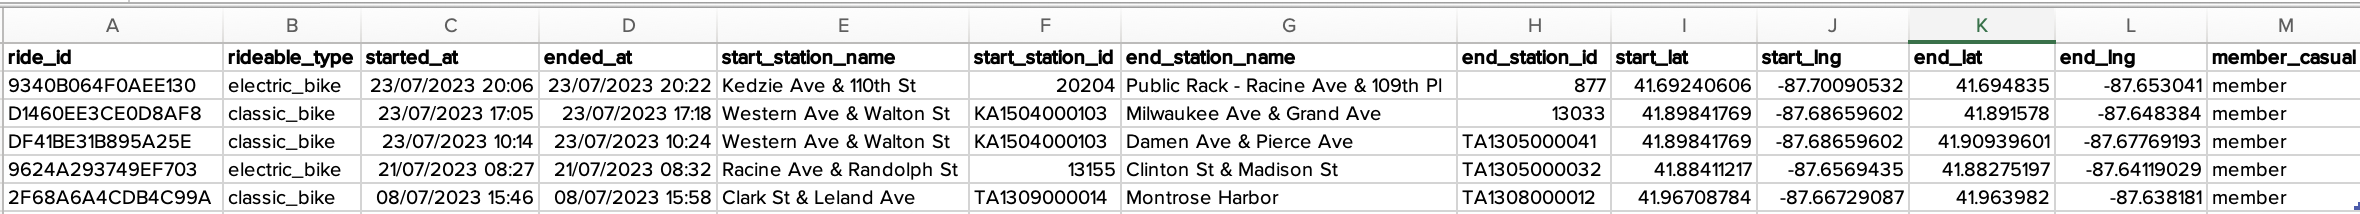

Key observations:

* The dataset includes expected columns such as `ride_id`, `bike_type`, `trip_start_time`, and `membership`.
* Initial checks suggest that the data is well-structured, but further analysis will be conducted to identify any data quality issues, such as duplicates, missing values or inconsistencies.

# Data Cleaning
At this stage of the project, I focussed on cleaning the `cyclistic_raw` table to ensure data integrity and quality. The goal was to eliminate errors, standardise data formats as well as maintain consistency throughout the dataset. Key steps included handling duplicate `ride_id` values to keep only unique rides, removing rows with missing latitude and longitude coordinates (which are required for geospatial analysis), and validating date and time formats to ensure ride duration makes sensen chronologically. Finally, I checked that all latitude and longitude values were within valid ranges and standardised the `rideable_type` column to lower case, single_word values like "electric" or "classic" for consistency. 

## Handling Duplicates
### Identifying and Handling Duplicate `ride_id` Records
The `ride_id` column in the `cyclistic_raw` table is important because it identifies each unique bike ride. Any duplicate values in the column could result in incorrect data interpretaions (eg, counting the same ride data multiple times). It is therefore important to ensure all values in the `ride_id` column are distinct.

I used the following query to identify duplicates:

```sql
SELECT "ride_id", COUNT("ride_id") AS "duplicates"
FROM "cyclistic_raw"
GROUP BY "ride_id" 
HAVING COUNT("ride_id") > 1;
```

This query returns all `ride_id` records that appear more than once in the table. The result showed 666,582 rows, which means there are 666,582 ride ids with more than one occurrence. 

### Storing and Removing Duplicate Records
For backup purposes and effective record maintenance, I saved all the duplicate values into a CSV file. 

To delete the duplicate records from the `cyclistic_raw` table while retaining one unique `ride_id` for each duplicated set, I used the following SQL query:

```sql
DELETE FROM
    "cyclistic_raw" AS "cr1"
    USING "cyclistic_raw" AS "cr2"
WHERE 
    "cr1"."id" < "cr2"."id"
    AND "cr1"."ride_id" = "cr2"."ride_id";
```

The query removed 666,582 duplicate records.

**NEW TOTAL ROWS COUNT: 5,197,057**

## Handling `NULL` Values
### Identifying rows with `NULL` values
To ensure data integrity, I conducted a null values check on the `cyclistic_raw` table. The following SQL query was used to identify the total number of null values across each relevant column in the table:

```sql
SELECT 
	COUNT(*) AS "total_rows",
	SUM(CASE WHEN "ride_id" IS NULL THEN 1 ELSE 0 END) AS "null_ride_id",
	SUM(CASE WHEN "rideable_type" IS NULL THEN 1 ELSE 0 END) AS "null_rideable_type",
	SUM(CASE WHEN "started_at" IS NULL THEN 1 ELSE 0 END) AS "null_started_at",
	SUM(CASE WHEN "ended_at" IS NULL THEN 1 ELSE 0 END) AS "null_ended_at",
	SUM(CASE WHEN "start_station_name" IS NULL THEN 1 ELSE 0 END) AS "null_start_station_name",
	SUM(CASE WHEN "start_station_id" IS NULL THEN 1 ELSE 0 END) AS "null_start_station_id",
	SUM(CASE WHEN "end_station_name" IS NULL THEN 1 ELSE 0 END) AS "null_end_station_name",
	SUM(CASE WHEN "end_station_id" IS NULL THEN 1 ELSE 0 END) AS "null_end_station_id",
	SUM(CASE WHEN "start_lat" IS NULL THEN 1 ELSE 0 END) AS "null_start_lat",
	SUM(CASE WHEN "start_lng" IS NULL THEN 1 ELSE 0 END) AS "null_start_lng",
	SUM(CASE WHEN "end_lat" IS NULL THEN 1 ELSE 0 END) AS "null_end_lat",
	SUM(CASE WHEN "end_lng" IS NULL THEN 1 ELSE 0 END) AS "null_end_lng",
	SUM(CASE WHEN "member_casual" IS NULL THEN 1 ELSE 0 END) AS "null_member_casual"
FROM "cyclistic_raw";
```
Null values returned as follows:

* `start_station_name`: 848,568
* `start_station_id`: 848,568
* `end_station_name`: 891,223
* `end_station_id`: 891,223
* `end_lat`: 7,287
* `end_lng`: 7,287

I chose to remove rows with missing `end_lat` and `end_lng` coordinates, as these are essential for geospatial analysis. Accurate route and distance calculations rely on having complete coordinate data. However, I retained rows with missing values in other columns, as their null values do not significantly affect the ability to analyse trips using coordinates. 

### Eliminating Rows with Missing Latitude and Longitude Data
To ensure the integrity of the geospatial analysis, I removed rows with missing latitude and longitude coordinates. The deleted rows were also saved into a CSV file for reference or potential future analysis by using the `RETURNING *` statement.

```sql
DELETE FROM "cyclistic_raw"
WHERE "end_lat" IS NULL OR "end_lng" IS NULL
RETURNING *;
```

**TOTAL ROWS AFTER DELETING NULL COORDINATES: 5,189,770**

## Validating and Correcting Data Types
### Datetime Columns
#### Checking the Format of `started_at` and `ended_at` Columns
To ensure the datetime columns are correctly formatted, I conducted a validation check to convert the `started_at` and `ended_at` values into a standard timestamp format `YYYY-MM-DD HH24:MI:SS`. If any values could not be converted, they would return as `NULL`, indicating an invalid datetime format.

```SQL
SELECT COUNT(*) AS "invalid_started_at_times"
FROM "cyclistic_raw"
WHERE TO_TIMESTAMP("started_at"::text, 'YYYY-MM-DD HH24:MI:SS') IS NULL;
```

**TOTAL `invalid_started_at_times` ROWS: 0**

```sql
SELECT COUNT(*) AS "invalid_ended_at_times"
FROM "cyclistic_raw"
WHERE TO_TIMESTAMP("ended_at"::text, 'YYYY-MM-DD HH24:MI:SS') IS NULL;
```

**TOTAL `invalid_ended_at_times` ROWS: 0**
   
The results show that there are no invalid datetime values in the `started_at` and `ended_at` columns, confirming that the data is formatted correctly and ready for further analysis.

#### Validating Ride Duration: Ensuring `started_at` is Earlier Than `ended_at`
To maintain the logical integrity of the datetime data, I verified that the `started_at` timestamp always occurs before the `ended_at` timestamp for each ride. This validation helps identify records where the ride's start time is incorrectly recorded as happening after its end time. 

```sql
SELECT COUNT(*) AS "datetime_errors"
FROM "cyclistic_raw"
WHERE "started_at" > "ended_at";
```
 
**The above query returned 398 results.**

##### Key Observations

* The 398 records returned highlight instances where `started_at` is incorrectly recorded as occurring after `ended_at`.
* Since these entries represent clear errors and can’t be corrected, I opted to remove these records from the dataset to maintain data integrity:

```sql
DELETE FROM "cyclistic_raw"
WHERE "started_at" > "ended_at"
RETURNING *;
```

**TOTAL NUMBER OF ROWS AFTER THE LOGICAL ERRORS WERE REMOVED: 5,189,372.**

#### Identifying Rides with Identical `started_at` and `ended_at` Timestamps
To further ensure data accuracy, I checked for instances where the`started_at` and `ended_at` times for rides were identical. These cases are likely errors, as it is not possible for a trip to begin and end at the exact same time. 

```sql
SELECT COUNT(*) AS "identical_start_end_times"
FROM "cyclistic_raw"
WHERE "started_at" = "ended_at";
```

**The above query returned 1,176 results.**

##### Key Observations
* The records returned show instances where the `started_at` and `ended_at` are identical, which is likely due to errors in data recording or processing.
* As it is not possible to correct these errors, I decided to remove these records from the dataset to maintain data integrity.

```sql
DELETE FROM "cyclistic_raw"
WHERE "started_at" = "ended_at"
RETURNING *;
```

**TOTAL NUMBER OF ROWS AFTER THE LOGICAL ERRORS WERE REMOVED: 5,188,196.**


## Validating Latitude and Longitude Coordinates
To ensure the accuracy of geospatial data, I validated the latitude and longitude values to confirm they are numeric and [within valid geographic ranges](https://clickhouse.com/docs/en/sql-reference/functions/geo/coordinates):

```sql
-- Count invalid latitudes
SELECT COUNT(*) AS "invalid_lats"
FROM "cyclistic_raw"
WHERE 
	"start_lat" NOT BETWEEN -90 AND 90 
	OR "end_lat" NOT BETWEEN -90 AND 90;
 
-- Count invalid longitudes
SELECT COUNT(*) AS "invalid_lngs"
FROM "cyclistic_raw"
WHERE 
	"start_lng" NOT BETWEEN -180 AND 180 
	OR "end_lng" NOT BETWEEN -180 AND 180;
```

**Invalid rows for latitudes and longitudes: 0.**

This result indicates that all latitude and longitude values in the dataset fall within the correct geographic ranges, confirming the integrity of the geospatial data.

## Standardising Latitude and Longitude Values Using Rounding
```sql
UPDATE "cyclistic_raw"
SET "start_lat" = ROUND("start_lat"::NUMERIC, 6),
    "start_lng" = ROUND("start_lng"::NUMERIC, 6),
    "end_lat" = ROUND("end_lat"::NUMERIC, 6),
    "end_lng" = ROUND("end_lng"::NUMERIC, 6);
```

## String Consistency: Ensuring the Accuracy of Textual Data
To ensure text data in the table is consistent and easy to work with, I focussed on cleaning up some of the key columns.

### Convert Text in the `rideable_type` to Lower Case
First up, I needed to standardise the `rideable_type` column by converting all values to lower case. This is important to avoid any mix-ups caused by different capitalisation (eg "Electric_Bike" vs. "electric_bike"). By making everything lower case, I can group and filter the data more reliably:

```sql
UPDATE "cyclistic_raw"
SET "rideable_type" = LOWER("rideable_type");
```

### Formatting`rideable_type` Values to Keep Them Simple
I wanted to simplify the `rideable_type` column further. The idea here was to strip out the extra bits and just keep the core type of bike: "electric", "classic", or "docked":

```sql
UPDATE "cyclistic_raw"
SET "rideable_type" = split_part("rideable_type"::TEXT,'_', 1);
```

# Data Transformation: Preparing the Dataset for Analysis
## Identifying and Removing Outliers
As part of the data transformation process, it was essential to identify and remove outliers in ride durations to maintain the integrity of the analysis. For this dataset, rides lasting two days or longer were deemed outliers due to their unusual length, which could indicate data errors or anomalies. The following SQL query was executed to identify these outliers:

```sql
SELECT 
	"ride_id",
	"member_casual",
	"ended_at" - "started_at" AS "ride_duration"
FROM 
    "cyclistic_raw"
WHERE 
    "ended_at" - "started_at" >= '2 days' 
ORDER BY 
    "ride_duration" DESC;
```

The query identified three records with ride durations exceeding two days. Interestingly, all of these extended rides were associated with casual riders. To remove these outliers and prevent them from skewing the analysis, the following SQL query was used to delete these records from the `cyclistic_raw` table:

```sql
DELETE FROM "cyclistic_raw"
WHERE "ended_at" - "started_at" >= '2 days';
```

Additionally, outliers with ride durations shorter than one minute were also identified, as such short rides are unlikely to represent meaningful trips and could distort the analysis. The query below was used to pinpoint these records:

```sql
SELECT 
	"ride_id",
	"member_casual",
	"ended_at" - "started_at" AS "ride_duration"
FROM "cyclistic_raw"
WHERE "ended_at" - "started_at" < '1 minute' 
ORDER BY "ride_duration" DESC;
```

This query returned 121,716 records with ride durations less than one minute. To maintain data quality, these records were removed from the dataset using the following query:

```sql
DELETE FROM "cyclistic_raw"
WHERE "ended_at" - "started_at" < '1 minute';
```

**TOTAL NUMBER OF ROWS AFTER THE OUTLIERS WERE REMOVED: 5,066,477.**

# Data Normalisation 
## The Process of Data Normalisation
The `cyclistic_raw` table contains various attributes related to bike rides, such as unique ride IDs, station names, and customer and bike types. To optimise the database structure and improve data integrity, I chose to normalise the `cyclistic_raw` table by splitting it into two distinct tables: **rides** and **stations**. Each table focusses on a specific entity and aims to reduce data redundancy.

Before proceeding with normalisation, I explored the data in `cyclistic_raw` to identify any challenges:

* `NULL` values: key station id columns contain `NULL` values
* Unique identifiers: only `ride_id` uniquely identifies each record
* Redundancy: latitude and longitude data have many repetitions, indicating multiple rides starting and/or ending at the same locations
* Dependencies: before splitting the table, I need to identify how various attributes depend on the primary key `ride_id` and on each other. 

### Step 1: Identify Attributes and Dependencies
To begin, I wanted to understand the relationships between data fields to guide me through the process of normalisation:

* Primary key dependency: `ride_id` => all other attributes in `cyclistic_raw`
* Other possible dependencies: 
    * latitude and longitude can be used to identify stations as station ids and station names contain `NULL` values and I have not access to the business's database to fill in the gaps.

I decided to use latitude and longitude as keys for station identification.

### Step 2: Create the `stations` Table
I created a table to store unique station information based on latitude and longitude:

```sql
CREATE TABLE "stations" (
	"station_id" SERIAL,
	"station_name" VARCHAR,
	"lat" DECIMAL(9,6) NOT NULL,
	"lng" DECIMAL(9,6) NOT NULL,
	PRIMARY KEY("station_id")
);
```

### Step 3: Populate the `stations` Table
I populated the `stations` table with unique stations from `cyclistic_raw` using latitude and longitude, and I also decided to incorporate station names when available:

```sql
INSERT INTO "stations" ("station_name", "lat", "lng")
SELECT DISTINCT
    COALESCE("station_name", 'Unknown Station') AS "station_name",
    "lat",
    "lng"
FROM (
    	(SELECT
            "start_station_name" AS "station_name",
            ROUND("start_lat"::numeric, 6) AS "lat",
            ROUND("start_lng"::numeric, 6) AS "lng"
        FROM "cyclistic_raw"
        WHERE 
			"start_lat" IS NOT NULL 
			AND "start_lng" IS NOT NULL
    	)
    UNION
    	(
        SELECT
            "end_station_name" AS "station_name",
            ROUND("end_lat"::numeric, 6) AS "lat",
            ROUND("end_lng"::numeric, 6) AS "lng"
        FROM "cyclistic_raw"
        WHERE 
			"end_lat" IS NOT NULL 
			AND "end_lng" IS NOT NULL
    	)
	) AS "station_data";
```

* I used `COALESCE` to replace `NULL` values in station names with "Unknown Station".
* I decided to round coordinates to 6 decimal places to avoid any precision issues
* I chose to use the `UNION` operator to combine starting and ending stations into a single list of unique stations.

### Step 4: Create the `rides` Table
I created a table to store ride information without redundant station data:

```sql
CREATE TABLE "rides" (
    "ride_id" VARCHAR,
    "ride_distance_km" FLOAT,
    "started_at" TIMESTAMP,
    "ended_at" TIMESTAMP,
    "start_station_id" INT,
    "end_station_id" INT,
    "rideable_type" VARCHAR,
    "member_casual" VARCHAR,
	PRIMARY KEY("ride_id"),
    FOREIGN KEY ("start_station_id") REFERENCES "stations"("station_id"),
    FOREIGN KEY ("end_station_id") REFERENCES "stations"("station_id")
);
```

### Step 5: Populate the `rides` Table
At this step, I inserted data in the `rides` table and linked it to the `stations` table. As there are millions of rows to be transferred, I wanted to ensure no duplicate `ride_id` values get transferred by using the `ON CONFLICT` clause (this clause allowed me to skip any duplicates during the insertion process):

```sql
INSERT INTO "rides" ("ride_id", "ride_distance_km", "started_at", "ended_at", "start_station_id", "end_station_id", "rideable_type", "member_casual")
SELECT 
	"cyclistic_raw"."ride_id", 
	"cyclistic_raw"."ride_distance_km", 
	"cyclistic_raw"."started_at", 
	"cyclistic_raw"."ended_at", 
	"stations_start"."station_id" AS "start_station_id", 
	"stations_end"."station_id" AS "end_station_id", 
	"cyclistic_raw"."rideable_type", 
	"cyclistic_raw"."member_casual"
FROM "cyclistic_raw" 
LEFT JOIN "stations" AS "stations_start" 
    ON ROUND("cyclistic_raw"."start_lat"::numeric, 6) = "stations_start"."lat"
    AND ROUND("cyclistic_raw"."start_lng"::numeric, 6) = "stations_start"."lng"
LEFT JOIN "stations" AS "stations_end" 
    ON ROUND("cyclistic_raw"."end_lat"::numeric, 6) = "stations_end"."lat"
    AND ROUND("cyclistic_raw"."end_lng"::numeric, 6) = "stations_end"."lng"
ON CONFLICT ("ride_id") DO NOTHING;
```

### Step 6: Verify Data Integrity
To ensure that data has been transferred correctly and that relationships are maintained, I performed two checks:

#### Record Counts
```sql
SELECT COUNT(DISTINCT "ride_id") FROM "cyclistic_raw";
```
```sql
SELECT COUNT(*) FROM "rides";
```
**Both queries returned identical number of rows: 5,066,476.**

#### Sample Data Checks
```sql
SELECT
    "rides"."ride_id",
    "stations_start"."station_name" AS "start_station",
    "stations_end"."station_name" AS "end_station",
    "rides"."started_at",
    "rides"."ended_at"
FROM "rides" 
LEFT JOIN "stations" AS "stations_start" ON "rides"."start_station_id" = "stations_start"."station_id"
LEFT JOIN "stations" AS  "stations_end" ON "rides"."end_station_id" = "stations_end"."station_id"
LIMIT 10;
```
The rides appear to be correctly linked to stations, and `start_station_id` and `end_station_id` values reference valid `station_id` values in the `stations` table. 


### Step 7: Optimise the Database

```sql
CREATE INDEX "idx_stations_lat_lng" ON "stations"("lat", "lng");
CREATE INDEX "idx_rides_started_at" ON "rides"("started_at");
CREATE INDEX "idx_rides_start_station_id" ON "rides"("start_station_id");
CREATE INDEX "idx_rides_end_station_id" ON "rides"("end_station_id");
```

### Step 8: Rename Columns in the `rides` Table

```sql
ALTER TABLE "rides"
RENAME COLUMN "started_at" TO "ride_start_time";

ALTER TABLE "rides"
RENAME COLUMN "ended_at" TO "ride_end_time";

ALTER TABLE "rides"
RENAME COLUMN "rideable_type" TO "bike_type";

ALTER TABLE "rides"
RENAME COLUMN "member_casual" TO "customer_type";
```

# Data Analysis: Understanding User Behaviour and Trends
## User Base Composition: Counting Annual Members vs. Casual Riders
To understand the overall composition of Cyclistic’s users, I first analysed the distribution of annual members versus casual riders. This analysis helped identify the proportion of each customer type within the dataset. Additionally, I explored the preferences for different bike types among these groups, revealing which types of bikes are favoured by each customer type.

### Step 1: Analysing the Distribution of Annual Members and Casual Riders to Understand the Overall Composition of Cyclistic’s Customer Base
The following query was used to count the number of annual members compared to casual users for the period between July 2023 and June 2024.

```sql
SELECT
	COUNT(*),
	"customer_type"
FROM "rides"
GROUP BY "customer_type";
```

| Customer Type   | Number of Rides  |
|-----------------|-----------------:|
| Casual Riders   |        1,816,297 |
| Annual Members  |        3,250,179 |


### Step 2. Identifying Which Types of Bikes Are Most Favoured by Annual Members and Casual Riders
To further understand user behaviour, I analysed the preferences for different bike types across the membership types. This query identifies which bike types are most popular among annual members and casual customers.

```sql
SELECT 
	COUNT("bike_type") AS "preferences",
	"bike_type",
	"customer_type"
FROM "rides"
GROUP BY 
	"bike_type",
	"customer_type"
ORDER BY "preferences" DESC;
```

| Bike Type     | Annual Members | Casual Customers |
|---------------|----------------|------------------|
| Classic Bike  | 1,678,881      | 866,031          |
| Electric Bike | 1,571,298      | 917,256          |
| Docked Bike   | 0              | 33,010           |

## Ride Duration Analysis
I conducted a detailed analysis of trip durations to uncover key insights into how long customers typically ride, broken down by customer type. To ensure the analysis focussed on actual rides, I excluded trips under one minute. The analysis included identifying the longest, shortest, and average trip durations, as well as exploring the most frequent trip durations for both annual members and casual riders. Additionally, I examined the distribution of trip durations across various time intervals to determine whether trips are generally short, medium, or long. Finally, I identified the most popular hour of the day for trips to understand peak usage times.

To prepare the dataset for analysis and ensure consistency in the data, I created a view to pull data from the `rides` table with a new column, `ride_duration_seconds`, to store each ride’s duration in seconds. This approach allows for calculations, comparisons, and aggregations during analysis.

### Step 1: Create a New View `ride_durations`

```sql
CREATE VIEW "ride_durations" AS 
SELECT 
	"ride_id", 
	"customer_type", 
	EXTRACT(EPOCH FROM ("ride_end_time" - "ride_start_time")) AS "ride_duration_seconds"
FROM "rides";
```

### Step 2: Summarise Ride Durations by Customer Type (Excluding Short Rides)
This query calculates the shortest, longest, and average ride durations for both annual members and casual riders, providing an overview of how ride lengths vary between the two groups.

```sql
SELECT
	"customer_type",
	ROUND(MIN("ride_duration_seconds"), 2) AS "shortest_ride",
	ROUND(MAX("ride_duration_seconds"), 2) AS "longest_ride",
	ROUND(AVG("ride_duration_seconds"), 2) AS "average_ride_length"
FROM "ride_durations"
WHERE "ride_duration_seconds" > 60
GROUP BY "customer_type";
```


| Customer type  | Shortest ride  | Longest ride   | Average ride length |
|----------------|----------------|----------------|---------------------|
| Casual         | 60.01          | 147471         | 1328.88             |
| Member         | 60.02          | 89996          | 762.68              |


### Step 3: Identify Most Common Ride Durations
This query identifies the most common ride durations for both annual members and casual riders. It performs separate calculations for each customer type and then combines the results to highlight the most common ride durations across the customer base.

```sql
SELECT * 
FROM (
	SELECT 
		"customer_type",
		ROUND("ride_duration_seconds", 0) AS "ride_durations_seconds",
		COUNT(*) AS "common_ride_durations"
	FROM "ride_durations"
	WHERE "customer_type" = 'member'
	GROUP BY 
		"ride_duration_seconds", 
		"customer_type"
	ORDER BY "common_ride_durations" DESC
	LIMIT 3
) AS "annual_members"
UNION ALL
SELECT *
FROM (
	SELECT 
		"customer_type",
		ROUND("ride_duration_seconds", 0) AS "ride_durations_seconds",
		COUNT(*) AS "common_ride_durations"
	FROM "ride_durations"
	WHERE "customer_type" = 'casual'
	GROUP BY 
		"ride_duration_seconds", 
		"customer_type"
	ORDER BY "common_ride_durations" DESC
	LIMIT 3
) AS "casual_riders";
``` 

| Customer Type | Ride Duration (Seconds)  | Common Ride Duration (Rides)   |
|---------------|--------------------------|--------------------------------|
| Member        | 292                      | 3,968                          |
| Member        | 279                      | 3,947                          |
| Member        | 298                      | 3,937                          |
| Casual        | 378                      | 1,539                          |
| Casual        | 368                      | 1,538                          |
| Casual        | 344                      | 1,514                          |

### Step 4: Ride Duration Distribution: How Rides Are Spread Out Across Time Intervals
This query categorises ride durations into different time intervals (0-10 minutes, 10-20 minutes, 20-30 minutes, and 30+ minutes) to understand how rides are distributed across these intervals for each customer type. This helps to identify whether rides are generally short, medium, or long.

```sql
SELECT 
	"customer_type",
	CASE 
		WHEN "ride_duration_seconds" / 60 <= 10 THEN '0-10 minutes'
		WHEN "ride_duration_seconds" / 60 <= 20 THEN '10-20 minutes'
		WHEN "ride_duration_seconds" / 60 <= 30 THEN '20-30 minutes'
		ELSE '30+ minutes'
	END AS "duration_distribution",
	COUNT(*) AS "ride_count"
FROM "ride_durations"
GROUP BY
	"customer_type",
	"duration_distribution"
ORDER BY 
	"customer_type",
	"duration_distribution";
```

| Customer Type | Ride Duration Distribution | Ride Count |
|---------------|----------------------------|------------|
| Casual        | 0-10 minutes               | 709,418    |
| Casual        | 10-20 minutes              | 550,735    |
| Casual        | 20-30 minutes              | 233,043    |
| Casual        | 30+ minutes                | 323,101    |
| Member        | 0-10 minutes               | 1,808,220  |
| Member        | 10-20 minutes              | 945,150    |
| Member        | 20-30 minutes              | 298,922    |
| Member        | 30+ minutes                | 197,887    |

### Step 5: Peak Usage Times: Most Popular Hour of the Day
This query identifies the most popular hours of the day for bike rides by extracting the hour from the `ride_start_time` for each ride. Grouping the results by customer type provides insights into peak usage times for both annual members and casual riders.

```sql
SELECT
	"customer_type",
	EXTRACT(HOUR FROM "ride_start_time") AS "most_popular_time",
	COUNT(*) AS "ride_count"
FROM "rides"
GROUP BY  
	"customer_type",
	"most_popular_time"
ORDER BY 
	"customer_type", 
	"most_popular_time" DESC;
```

## Temporal Analysis: Daily and Monthly Popularity
To explore how bike usage varies over time, I analysed the popularity of bike rides on different days of the week and across the months of the year. By grouping rides by day and month, and separating the analysis by customer type, I gained insights into patterns such as which days or months see the highest or lowest activity. 

### Step 1: Daily Popularity by Customer Type
This query calculates the number of rides taken on each day of the week by customer type, helping to identify the most and least popular days for the both types of customers.

#### Step 1.1: Create a New View to Display the Day of the Week for Each Ride

```sql
CREATE VIEW "days_and_months" AS
SELECT 
	"ride_id",
	"customer_type",
	TO_CHAR("ride_start_time", 'day') AS "day_of_week",
	TO_CHAR("ride_start_time", 'month') AS "month"
FROM "rides";
```

#### Step 1.2: Identify Popular Days for Rides for Both Customer Types

```sql
SELECT 
	"customer_type",
	"day_of_week",
	COUNT("day_of_week") AS "popular_days"
FROM "days_and_months"
GROUP BY 
	"customer_type",
	"day_of_week"
ORDER BY 
	"customer_type", 
	"popular_days" DESC;
```

**Casual Riders**

| Day        | Number of Rides  |
|------------|-----------------:|
| Saturday   |          380,559 |
| Sunday     |          310,265 |
| Friday     |          266,598 |
| Thursday   |          227,140 |
| Wednesday  |          218,364 |
| Monday     |          206,978 |
| Tuesday    |          206,393 |

**Annual Members**

| Day        | Number of Rides  |
|------------|-----------------:|
| Wednesday  |          524,006 |
| Thursday   |          522,189 |
| Tuesday    |          492,901 |
| Friday     |          465,113 |
| Monday     |          442,700 |
| Saturday   |          434,542 |
| Sunday     |          368,728 |

#### Step 1.3: Seasonal Trends: Most Popular Months for Bike Usage
This query helps determine the most popular months for bike usage, categorised by customer type. By counting the number of rides each month, this analysis ranks the months based on their popularity, offering insights into seasonal trends in bike usage.

```sql
SELECT 
	"month",
	COUNT("month") AS "popular_month",
	"customer_type"
FROM "days_and_months"
GROUP BY 
	"month", 
	"customer_type"
ORDER BY 
	"popular_month" DESC,
	"customer_type";
```
**Casual Riders**

| Month      | Number of Rides |
|------------|-----------------:|
| July       |          321,455 |
| August     |          302,656 |
| June       |          289,855 |
| September  |          255,068 |
| May        |          223,155 |
| April      |          127,628 |
| November   |           96,015 |
| March      |           80,335 |
| December   |           50,419 |
| February   |           46,045 |
| January    |           23,666 |

**Annual Members**

| Month      | Number of Rides |
|------------|-----------------:|
| August     |          449,405 |
| July       |          424,778 |
| June       |          401,973 |
| September  |          396,148 |
| May        |          369,980 |
| April      |          276,723 |
| November   |          258,749 |
| March      |          214,368 |
| February   |          172,820 |
| December   |          168,652 |
| January    |          116,583 |

## Ride Distance Analysis
In this section, I focussed on understanding the average distance travelled by riders. 

### Step 1: Create a New View to Display Distance Values
First, I created a View `ride_distances_km`, which provides combined data about each bike ride from the `rides` table by adding details about start and end stations and calculating the approximate distance travelled in kilometers for each ride. The query uses two Common Table Expressions, `start_stations` and `end_stations`, to generate information about the start and end points of each ride:

```sql
CREATE VIEW "ride_distances_km" AS
	WITH "start_stations" AS (
	    SELECT 
	        "rides"."ride_id", 
	        "rides"."start_station_id",
	        "stations"."station_name" AS "start_station_name",
	        "stations"."lat" AS "start_lat",
	        "stations"."lng" AS "start_lng"
	    FROM "rides"
	    JOIN "stations" ON "rides"."start_station_id" = "stations"."station_id"
	),
	"end_stations" AS (
	    SELECT 
	        "rides"."ride_id", 
	        "rides"."end_station_id",
	        "stations"."station_name" AS "end_station_name",
	        "stations"."lat" AS "end_lat",
	        "stations"."lng" AS "end_lng"
	    FROM "rides"
	    JOIN "stations" ON "rides"."end_station_id" = "stations"."station_id"
	)
SELECT 
    "start_stations"."ride_id",
    "start_stations"."start_station_id",
    "start_stations"."start_station_name",
    "start_stations"."start_lat",
    "start_stations"."start_lng",
    "end_stations"."end_station_id",
    "end_stations"."end_station_name",
    "end_stations"."end_lat",
    "end_stations"."end_lng",
    6371 * acos(
        LEAST(1.0, GREATEST(-1.0, 
            cos(radians("start_stations"."start_lat")) * cos(radians("end_stations"."end_lat")) * 
            cos(radians("end_stations"."end_lng") - radians("start_stations"."start_lng")) + 
            sin(radians("start_stations"."start_lat")) * sin(radians("end_stations"."end_lat"))
        ))
    ) AS "ride_distance_km"
FROM "start_stations"
JOIN "end_stations" ON "start_stations"."ride_id" = "end_stations"."ride_id";
```

* CTEs for Start and End Stations:
    * `start_stations`: selects ride details (`ride_id`, `start_station_id`) and the corresponding start station’s name, latitude (`start_lat`), and longitude (`start_lng`). The information is generated by joining the `rides` table with the `stations` table.
    * `end_stations`: selects ride details (`ride_id`, `end_station_id`) and the corresponding end station’s name, latitude (`end_lat`), and longitude (`end_lng`). It joins the `rides` table with the `stations` table to get this data.
    
* Join on `ride_id`:
The `start_stations` and `end_stations` CTEs are joined using `ride_id` to match each ride’s start and end locations.

* Calculating Distance:
The query uses the Haversine formula to calculate the straight-line distance between the start and end stations of each ride. The formula accounts for the curvature of the earth, and the result is given in kilometers (km).
    * 6371: represents the approximate radius of the Earth in kilometers
    * the calculation uses trigonometric functions (sin, cos) to determine the distance based on the latitude and longitude of the start and end stations.
    
* Creating the View:
    * Columns from both `start_stations` and `end_stations` CTEs (`ride_id`, `station IDs`, `names`, and `coordinates`).
    * A new column called `ride_distance_km`, which stores the calculated distance between the start and end locations.

### Step 2: Calculate Average Distance Travelled per Day by Customer Type

```sql
SELECT
	"days_and_months"."customer_type",
	"days_and_months"."day_of_week",
	ROUND(AVG("ride_distances_km"."ride_distance_km")::numeric, 2) AS "average_distance_km"
FROM "days_and_months"
JOIN "ride_distances_km" ON "ride_distances_km"."ride_id" = "days_and_months"."ride_id"
GROUP BY 
	"days_and_months"."customer_type", 
	"days_and_months"."day_of_week"
ORDER BY 
	"days_and_months"."customer_type",
	"average_distance_km" DESC; 
```
| **Customer Type** | **Day of Week** | **Average Distance (km)** |
|-------------------|------------------|--------------------------|
| **Casual**        | Saturday         | 2.30                     |
|                   | Sunday           | 2.25                     |
|                   | Friday           | 2.18                     |
|                   | Wednesday        | 2.12                     |
|                   | Thursday         | 2.11                     |
|                   | Tuesday          | 2.11                     |
|                   | Monday           | 2.10                     |
| **Member**        | Saturday         | 2.28                     |
|                   | Sunday           | 2.26                     |
|                   | Wednesday        | 2.18                     |
|                   | Tuesday          | 2.18                     |
|                   | Thursday         | 2.16                     |
|                   | Friday           | 2.14                     |
|                   | Monday           | 2.13                     |


### Step 3: Calculate Overall Average Distance by Customer Type
Compare the overall average distance travelled by annual members versus casual riders.

```sql
SELECT
	"rides"."customer_type",
	ROUND(AVG("ride_distances_km"."ride_distance_km")::numeric, 2) AS "avg_ride_distance"
FROM "rides"
JOIN "ride_distances_km" ON "ride_distances_km"."ride_id" = "rides"."ride_id"
GROUP BY "rides"."customer_type";
```
| **Customer Type** | **Average Ride Distance (km)**|
|-------------------|-------------------------------|
| **Casual**        | 2.18                          |
| **Member**        | 2.19                          |

## Geospatial Analysis
To understand the geographical aspects of bike usage, I analysed the most popular start coordinates for both annual members and casual riders. This geospatial analysis identified key locations that are central to Cyclistic’s operations. I also conducted a round-trip analysis, identifying rides that start and end at the same location. This analysis provides insights into user behaviour, such as whether certain stations are more frequently used for leisure rides or commuting. 

### Step 1: Identify Top 5 Most Popular Starting Locations for Annual Members and Casual Riders
Identifying the most popular starting coordinates for bike rides, ranked by ride count, for both annual members and casual riders:

```sql
SELECT *
FROM (
	SELECT
		"rides"."customer_type",
		"stations"."station_name",
		"stations"."lat",
		"stations"."lng",
		COUNT("rides"."start_station_id") AS "number_of_ride_starts"
	FROM "rides"
	LEFT JOIN "stations" ON "stations"."station_id" = "rides"."start_station_id"
	WHERE "customer_type" = 'member'
	GROUP BY 
		"rides"."customer_type",
		"stations"."station_name",
		"stations"."lat",
		"stations"."lng"
	ORDER BY "number_of_ride_starts" DESC
	LIMIT 5
) AS "popular_start_staions_members"
UNION ALL
SELECT *	
FROM (
	SELECT
		"rides"."customer_type",
		"stations"."station_name",
		"stations"."lat",
		"stations"."lng",
		COUNT("rides"."start_station_id") AS "number_of_ride_starts"
	FROM "rides"
	LEFT JOIN "stations" ON "stations"."station_id" = "rides"."start_station_id"
	WHERE "customer_type" = 'casual'
	GROUP BY 
		"rides"."customer_type",
		"stations"."station_name",
		"stations"."lat",
		"stations"."lng"
	ORDER BY "number_of_ride_starts" DESC
	LIMIT 5
) AS "popular_start_staions_members";
```

| Customer Type | Station Name                       | Latitude  | Longitude  | Number of Ride Starts |
|---------------|------------------------------------|-----------|------------|-----------------------|
| **Casual**    | Streeter Dr & Grand Ave            | 41.892300 | -87.612000 | 34,568                |
| **Casual**    | DuSable Lake Shore Dr & Monroe St  | 41.881000 | -87.616700 | 22,751                |
| **Casual**    | DuSable Lake Shore Dr & North Blvd | 41.911700 | -87.626800 | 17,005                |
| **Casual**    | Michigan Ave & Oak St              | 41.901000 | -87.623800 | 16,923                |
| **Casual**    | Millennium Park                    | 41.881000 | -87.624100 | 13,504                |
|---------------|------------------------------------|-----------|------------|-----------------------|
| **Member**    | Kingsbury St & Kinzie St           | 41.889200 | -87.638500 | 17,234                |
| **Member**    | 53 West Hubbard St                 | 41.890000 | -87.630000 | 15,066                |
| **Member**    | Clinton St & Washington Blvd       | 41.883400 | -87.641200 | 14,221                |
| **Member**    | University Ave & 57th St           | 41.791500 | -87.599900 | 13,741                |
| **Member**    | 41 West Marble Place               | 41.880000 | -87.630000 | 13,270                |

**2. Round-Trip Analysis: Exploring Trips That Start and End at the Same Location.**

This query focusses on trips where users returned to their starting location. These trips can provide insights into recreational riding patterns or scenarios where users might have changed their plans mid-journey.

```sql
SELECT
    membership,
    start_lat,
    start_lng,
    end_lat,
    end_lng,
    ROUND(EXTRACT(EPOCH FROM trip_duration) / 60) AS rounded_duration_minutes,
    COUNT(*) AS frequency
FROM bikeshare_clean
WHERE
    (start_lat = end_lat AND start_lng = end_lng) AND 
    trip_duration > INTERVAL '1 minute'
GROUP BY 
    membership, 
    start_lat, 
    start_lng, 
    end_lat, 
    end_lng, 
    ROUND(EXTRACT(EPOCH FROM trip_duration) / 60)
ORDER BY frequency DESC;
```

<h1 style="color:#819BAF; font-size:32px; font-family:'Proxima Nova', sans-serif;">
Key Insights and Observations
</h1>

<h2 style="color:#7C7098; font-size:28px; font-family:'Proxima Nova', sans-serif;">
Cyclistic's Membership Overview
</h2>

<img src="https://github.com/dmitrymitenkoff/cyclistic/raw/3a633bb9a112cd135a40404cb25304a2e292baef/01-Comparing%20Annual%20Members%20and%20Casual%20Riders-2.jpeg" alt="Annual Members vs Casual Riders" width="400">

*You can explore the interactive Tableau worksheet for this analysis [here](https://public.tableau.com/views/PedallingThroughDataCyclisticsUsageTrends/01-ComparingAnnualMembersandCasualRiders?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link).*

This chart provides an overview of the distribution between annual members and casual riders who used Cyclistic’s services over the past year. The data reveals that annual members constitute the majority of Cyclistic’s user base, accounting for over 60% of all rides. In contrast, casual riders make up a significant but smaller portion, representing just over 30% of the total rides. This distribution suggests that Cyclistic’s offerings appeal to customers who are committed to purchasing an annual membership.

<img src="https://github.com/dmitrymitenkoff/cyclistic/raw/3a633bb9a112cd135a40404cb25304a2e292baef/02-Cyclistic%20Rider%20Preferences_%20Bike%20Type%20by%20Membership%20Status.jpeg" alt="Bike Type Preferences" width="500">

*You can explore the interactive Tableau worksheet for this analysis [here](https://public.tableau.com/views/PedallingThroughDataCyclisticsUsageTrends/02-CyclisticRiderPreferencesBikeTypebyMembershipStatus?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link).*

This chart looks into preferences for bike types among the two rider groups. It shows that both annual members and casual riders have a nearly equal preference for classic bikes and electric bikes, with neither group showing a strong bias toward one type over the other. This indicates that the choice between classic and electric bikes is likely driven by factors other than membership type.

However, one distinction is observed with docked bikes. While docked bikes are a marginally less popular option overall, a small proportion (under 5%) of casual riders shows a preference for this bike type.

Key observations:

* The substantial use of classic and electric bikes across both customer types suggests that Cyclistic should continue to prioritise maintaining and expanding its fleet of these bikes to meet customer demand.

* The low preference for docked bikes among casual riders may warrant a closer examination of this bike type’s role within the service offering. Cyclistic might explore whether improving the availability or marketing of docked bikes could increase their usage or whether the focus should remain on enhancing the classic and electric bike options.

<h2 style="color:#7C7098; font-size:28px; font-family:'Proxima Nova', sans-serif;">
Trip Duration Analysis
</h2>

<h3 style="color:#D499AB; font-size:24px; font-family:'Proxima Nova', sans-serif;">
Analysis of Shortest, Longest, and Average Trip Durations
</h3>

<img src="https://github.com/dmitrymitenkoff/cyclistic/raw/3a633bb9a112cd135a40404cb25304a2e292baef/03-Trip%20Duration%20Comparison%20by%20Membership%20type.jpeg" width="350">

*You can explore the interactive Tableau worksheet for this analysis [here](https://public.tableau.com/views/PedallingThroughDataCyclisticsUsageTrends/03-TripDurationComparisonbyMembershiptype?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link).*

This chart compares the shortest, longest, and average trip durations between casual riders and annual members, with outliers removed. The removal of trips lasting over 2 days for casual riders has adjusted the metrics, providing a more accurate reflection of typical trip durations. While the average trip duration for casual riders is longer than that of annual members, the difference in longest trips is now less significant, with casual riders’ longest trip at nearly 41 hours compared to 25 hours for annual members.

<h3 style="color:#D499AB; font-size:24px; font-family:'Proxima Nova', sans-serif;">
Frequency of Most Common Trip Durations by Membership Type
</h3>

<img src="https://github.com/dmitrymitenkoff/cyclistic/raw/3a633bb9a112cd135a40404cb25304a2e292baef/04-Frequency%20of%20Most%20Common%20Trip%20Durations%20by%20Membership%20Type.jpeg" width="900">

*You can explore the interactive Tableau worksheet for this analysis [here](https://public.tableau.com/views/PedallingThroughDataCyclisticsUsageTrends/04-FrequencyofMostCommonTripDurationsbyMembershipType?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link).*

This chart compares the most frequent trip durations between annual members and casual riders. The data shows that the most common trip duration for casual riders is 6 minutes and 8 seconds, while for annual members, it is slightly shorter at 4 minutes and 52 seconds. Despite the longer average trip durations for casual riders, the frequency of trips in this specific time frame is lower than that of annual members. This pattern suggests that casual riders may use the service for slightly longer, more leisurely trips, while annual members are more likely to take shorter, more frequent rides.

<h3 style="color:#D499AB; font-size:24px; font-family:'Proxima Nova', sans-serif;">
Trip Duration Distribution by Membership Type
</h3>

<img src="https://github.com/dmitrymitenkoff/cyclistic/raw/3a633bb9a112cd135a40404cb25304a2e292baef/05-Trip%20Duration%20Distribution%20by%20Membership%20Types.jpeg" width="600">

*You can explore the interactive Tableau worksheet for this analysis [here](https://public.tableau.com/views/PedallingThroughDataCyclisticsUsageTrends/05-TripDurationDistributionbyMembershipTypes?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link).*

This chart reveals the distribution of trip durations for both annual members and casual riders, categorised into four time intervals: 0-10 minutes, 10-20 minutes, 20-30 minutes, and 30+ minutes.

* 0-10 minutes: the majority of trips fall within this category, with annual members making up a significantly larger portion compared to casual riders. This suggests that annual members frequently use the service for short, quick trips, possibly for daily commutes or errands.

* 10-20 minutes: while still prominent, the number of trips in this interval decreases. Annual members continue to dominate, but casual riders also contribute a substantial number of trips, indicating their usage for slightly longer journeys.

* 20-30 minutes: the trend continues with a noticeable decline in the number of trips. However, casual riders and annual members have closer numbers in this interval, suggesting that when casual riders use the service, they may do so for more extended leisure trips.

* 30+ minutes: in this category, casual riders surpass annual members in the number of trips. This indicates that casual riders are more likely to engage in longer rides, possibly for recreation or sightseeing, whereas annual members typically limit their rides to shorter durations.


<h2 style="color:#7C7098; font-size:28px; font-family:'Proxima Nova', sans-serif;">
Temporal Analysis: Weekly and Monthly Trends
</h2>


<h3 style="color:#D499AB; font-size:24px; font-family:'Proxima Nova', sans-serif;">
Peak Days for Annual Members and Casual Riders
</h3>

<img src="https://github.com/dmitrymitenkoff/cyclistic/raw/3a633bb9a112cd135a40404cb25304a2e292baef/06-Weekly%20Trip%20Patterns%20by%20Membership%20Type.jpeg" width="800">

*You can explore the interactive Tableau worksheet for this analysis [here](https://public.tableau.com/views/PedallingThroughDataCyclisticsUsageTrends/06-WeeklyTripPatternsbyMembershipType?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link).*


**Annual Members:**

* Peak day: Wednesday is the most popular day for biking among annual members, with a slight peak in the middle of the week.

* Weekday popularity: Monday through Friday shows relatively consistent high usage, indicating that annual members likely use the service for commuting or other routine activities during the work week.

* Weekend decline: there is a noticeable drop in bike usage on weekends, with Sundays being the least popular day. This suggests that annual members may rely on alternative transportation methods or take fewer trips on weekends.

**Casual Riders:**

* Weekend preference: casual riders show a strong preference for biking on weekends, with Saturday being the most popular day followed closely by Sunday.

* Lower weekday usage: the lower number of trips during the week suggests that casual riders might use bikes more for leisure rather than for daily commuting, and their activity significantly increases on weekends when they have more free time.

<h3 style="color:#D499AB; font-size:24px; font-family:'Proxima Nova', sans-serif;">
Summer vs. Winter Trends for Annual Members and Casual Riders
</h3>

<img src="https://github.com/dmitrymitenkoff/cyclistic/raw/3a633bb9a112cd135a40404cb25304a2e292baef/07-Monthly%20Trip%20Patterns%20by%20Membership%20Type.jpeg" width="1000">

*You can explore the interactive Tableau worksheet for this analysis [here](https://public.tableau.com/views/PedallingThroughDataCyclisticsUsageTrends/07-MonthlyTripPatternsbyMembershipType?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link).*

* The data demonstrates that the summer months (June to August) are the peak period for bike usage for both annual members and casual riders. This is likely due to the warmer weather, which encourages more people to ride bikes, both for commuting and leisure.

* However, the data also reveals a significant difference in bike usage between the two groups during the colder months (November to March). During these months, the proportion of casual riders drops significantly compared to annual members. This suggests that annual members, who may rely on biking as a consistent mode of transportation, continue to use the service more regularly, even in colder weather. In contrast, casual riders appear to be more influenced by seasonal conditions, using the service less frequently in the winter months.

* This indicates that while casual riders are more likely to use bikes during favourable weather conditions, annual members maintain a more steady usage pattern throughout the year, although their numbers also decrease during the winter months.


<h2 style="color:#7C7098; font-size:28px; font-family:'Proxima Nova', sans-serif;">
Distance Analysis
</h2>

<h3 style="color:#D499AB; font-size:24px; font-family:'Proxima Nova', sans-serif;">
Average Distance Travelled by Day of the Week
</h3>

<img src="https://github.com/dmitrymitenkoff/cyclistic/raw/3a633bb9a112cd135a40404cb25304a2e292baef/08-Average%20Distance%20Travelled%20by%20Membership%20Type.jpeg" width="800">

*You can explore the interactive Tableau worksheet for this analysis [here](https://public.tableau.com/views/PedallingThroughDataCyclisticsUsageTrends/08-AverageDistanceTravelledbyMembershipType?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link).*

* The charts demonstrate that Saturday stands out as the day with the highest average distance travelled for both casual riders and annual members. This trend suggests that casual riders are more likely to engage in biking for recreational purposes over the weekend, which aligns with previous findings that Saturday is the most popular day for casual riders.

* Interestingly, while Saturday and Sunday are also the days when annual members travel the most distance, these days are not the most popular for trips. This suggests that even annual members, who typically use the service during weekdays, possibly for commuting, also partake in longer, leisurely rides during weekends.

<h3 style="color:#D499AB; font-size:24px; font-family:'Proxima Nova', sans-serif;">
Overall Average Distance by Membership Type
</h3>

<img src="https://github.com/dmitrymitenkoff/cyclistic/raw/3a633bb9a112cd135a40404cb25304a2e292baef/09-Average%20Distance%20Travelled%20by%20Customer%20Type.jpeg" width="400">

*You can explore the interactive Tableau worksheet for this analysis [here](https://public.tableau.com/views/PedallingThroughDataCyclisticsUsageTrends/09-AverageDistanceTravelledbyCustomerType?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link).*

This chart shows that the average distance travelled by annual members and casual riders is very similar, with annual members travelling an average of 2.152 km per trip and casual riders travelling an average of 2.148 km per trip. This suggests that regardless of whether a rider is a casual user or an annual member, the typical distance they cover per trip is nearly identical. This similarity could indicate that the nature of the trips—whether for leisure, exercise, or commuting—is consistent across both groups.

<h2 style="color:#7C7098; font-size:28px; font-family:'Proxima Nova', sans-serif;">
Geospatial Analysis: Popular Bike Stations
</h2>

<h3 style="color:#D499AB; font-size:24px; font-family:'Proxima Nova', sans-serif;">
Top 10 Most Popular Start Locations by Membership Type
</h3>

<img src="https://github.com/dmitrymitenkoff/cyclistic/raw/3a633bb9a112cd135a40404cb25304a2e292baef/10-Top%2020%20Most%20Popular%20Bike%20Stations%20by%20Membership%20Type.jpeg" width="1000">

*You can explore the interactive Tableau worksheet for this analysis [here](https://public.tableau.com/views/PedallingThroughDataCyclisticsUsageTrends/10-Top20MostPopularBikeStationsbyMembershipType?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link).*

This chart presents the top 20 bike stations in terms of popularity, comparing usage between annual members (in blue) and casual riders (in orange).

Dominance of certain stations by casual riders:

* Streeterville is the most popular station, with a significant number of casual riders using it compared to annual members. This suggests that it is a preferred location for one-time or infrequent users.

* 1517 N Dearborn St and Chicago Loop, 60605 are also highly popular among casual riders, indicating that these stations might be near tourist spots or places that attract occasional users.

Stations preferred by annual members:

* Kingsbury St & Kinzie St and 53 W Hubbard St are predominantly used by annual members. These locations might be more convenient for regular commuters.

* Clark St & Elm St and Lincoln Park are also more frequently used by annual members, suggesting these are key stations for daily or regular use.

Shared popularity:

* Some stations like Near North Side and Adler Planetarium show almost equal usage by both casual riders and annual members. This indicates that these stations serve both tourists and daily commuters effectively.

General trend:

* The chart shows that certain stations have a clear preference by one group over the other, which could be due to the station’s location, the type of activities nearby, or convenience factors for different types of riders.


<h3 style="color:#D499AB; font-size:24px; font-family:'Proxima Nova', sans-serif;">
Round Trip Patterns by Membership Type
</h3>

<img src="https://github.com/dmitrymitenkoff/cyclistic/raw/22e7374cc33a46954e4ae9f1172eafba5d2f5218/11-Round%20Trip%20Comparison_%20Annual%20Members%20vs.%20Casual%20Riders.jpeg" width="400">

*You can explore the interactive Tableau worksheet for this analysis [here](https://public.tableau.com/views/PedallingThroughDataCyclisticsUsageTrends/11-RoundTripComparisonAnnualMembersvs_CasualRiders?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link).*

This chart shows the distribution of round trips between annual members and casual riders. The data indicates that casual riders account for a larger proportion of round trips compared to annual members. Specifically, casual riders completed 126,439 round trips, which constitutes 59.52% of the total round trips, while annual members completed 85,994 round trips, representing 40.48% of the total.

Key observations:

* Casual Riders: The higher number of round trips among casual riders suggests that they might be more inclined towards recreational or leisure biking, where they start and end their trips at the same location, such as sightseeing or casual outings.

* Annual Members: Although annual members make fewer round trips, this might reflect a more utility-driven approach to biking. Annual members could be using bikes for commuting or one-way errands where the start and end locations differ.


<h3 style="color:#D499AB; font-size:24px; font-family:'Proxima Nova', sans-serif;">
Round Trip Locations by Membership Type
</h3>

<img src="https://github.com/dmitrymitenkoff/cyclistic/raw/22e7374cc33a46954e4ae9f1172eafba5d2f5218/12-Top%2010%20Round%20Trip%20Locations%20by%20Membership%20Type.jpeg" width="1000">

*You can explore the interactive Tableau worksheet for this analysis [here](https://public.tableau.com/views/PedallingThroughDataCyclisticsUsageTrends/12-Top10RoundTripLocationsbyMembershipType?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link).*

The above chart shows the distribution of round trips, defined as rides that both start and end at the same location, between casual riders and annual members. The data clearly demonstrates that casual riders account for the majority of these round trips.

This significant difference suggests that casual riders are more likely to use Cyclistic bikes for recreational purposes such as sightseeing, exercising, or exploring the city. Casual riders may prefer to return to their starting point, indicating that their rides are more likely to be circular or exploratory in nature.

On the other hand, annual members may have more varied routes and are less likely to return to their starting point within a single trip. The lower proportion of round trips among annual members supports the assumption that their usage patterns are utility-based rather than circular routes.


<h2 style="color:#7C7098; font-size:28px; font-family:'Proxima Nova', sans-serif;">
Summary of Key Insights
</h2>

This section provides an overview of the differences in how Cyclistic’s annual members and casual riders use the bikeshare service. The following  insights highlight the primary differences between annual members and casual riders:

* User base: annual members make up 64% of Cyclistic’s customers, while casual riders account for 36% of bike triips.

* Bike preferences: annual members show a balanced preference between classic (33%) and electric bikes (31%). Casual riders slightly favour electric bikes (18%) over classic ones (17%), with a small portion using docked bikes (0.6%).

* Trip durations: both customer types share the same shortest trip duration of 1 minute. However, the longest trip for casual riders is nearly 41 hours, compared to just under 25 hours for annual members. On average, casual riders take longer trips (22 minutes) than annual members (12 minutes).

* Trip duration frequency: the most common trip duration for annual members is under 5 minutes, with over 4,000 trips. For casual riders, it is around 6 minutes, with just over 1,500 trips.

* Trip duration distribution: the majority of trips for both groups last 0-10 minutes. Annual members logged over 2 million such trips, while casual riders had just over 800,000. In the 10-20 minute range, annual members made about 1 million trips, and casual riders about 600,000. The fewest trips for casual riders were 20-30 minutes long, while for annual members, trips exceeding 30 minutes were the rarest.

* Peak days: annual members show consistent trip numbers throughout the week, with a slight peak on Wednesdays (586K trips). Casual riders favour weekends, with Saturday being the most popular day (410K trips).

* Seasonal trends: both customer types peak in the summer months, with August (760K trips) being the highest, followed by July (745K) and June (701K).

* Distance travelled: average distances are similar for both groups, with annual members travelling between 2.09km (Mondays) and 2.23km (Saturdays), and casual riders travelling between 2.06km (Mondays) and 2.26km (Saturdays). The overall average distance is nearly identical: 2.152km for annual members and 2.148km for casual riders.

* Starting locations: the most popular starting location for casual riders is Streeterville, while annual members have a more even distribution among Kingsbury St & Kinzie St, 53 W Hubbard St, and Clark St & Elm St.

* Round trips: casual riders are more likely to do round trips (60%) compared to annual members (40%). Of the top 10 round trip bike stations, nine are dominated by casual riders, with only one primarily used by annual members.


<h1 style="color:#819BAF; font-size:32px; font-family:'Proxima Nova', sans-serif;">
Recommendations
</h1>



<h2 style="color:#7C7098; font-size:28px; font-family:'Proxima Nova', sans-serif;">
Option 1: Weekend Freedom Membership
</h2>

This membership plan would target casual riders who prefer to use Cyclistic bikes on the weekends. It would offer unlimited bike rides on the three peak days for casual riders: Saturdays, Sundays, and Fridays. This membership could be marketed towards families, groups of friends, and individuals who enjoy recreational biking during the weekends. By providing unrestricted access on these days, Cyclistic could capitalise on the higher demand for leisure rides, encouraging more casual riders to convert to this flexible membership.

**Pros:**

* By offering a tailored membership to casual riders, Cyclistic can foster a sense of belonging and increase customer loyalty. Casual riders who value flexibility are more likely to remain engaged with the brand, leading to better long-term retention rates.

* This option helps manage bike availability more effectively during peak weekend times. By encouraging weekend use, Cyclistic can balance demand across the week, reducing the strain on the system during weekdays and ensuring better bike availability for all users.

* The introduction of a tailored membership that addresses the needs of casual riders would set Cyclistic apart from its competitors. 

**Cons:**

* If the Weekend Freedom Membership attracts a large number of users, it could lead to increased demand for bikes on weekends, potentially straining bike availability and infrastructure. This might result in customer dissatisfaction due to bike shortages, particularly during peak hours.

* Introducing a new membership option adds complexity to Cyclistic’s operations, including its IT infrastructure. This could require more targeted marketing, additional customer service resources, and more intricate management of membership plans, which could increase operational costs.

* The weekend membership might attract riders who only want to maximise the value by taking numerous short trips over the weekend, which could lead to unpredictable usage patterns. This could complicate bike distribution and maintenance scheduling.

<h3 style="color:#D499AB; font-size:24px; font-family:'Proxima Nova', sans-serif;">
Next Steps
</h3>

Marketing Analytics Team would:

* Conduct feasibility research to evaluate the potential demand for a weekend-focussed membership plan.

* Assess the technical requirements needed, eg, a new mobile app, to limit the usage to specific days of the week.

* Look into the potential revenue impact and determine optimal pricing. 


Marketing Director would:

* Initiate a campaign emphasising the benefits of stress-free weekend rides with unlimited trips. 

Executive Team would:

* Note this option because it provides an opportunity to tap into a new revenue stream by converting casual riders into annual members. Since the weekend is a peak time for casual riders, offering a membership that targets these high-demand days can increase overall membership rates and revenue without significantly impacting weekday operations.

<h2 style="color:#7C7098; font-size:28px; font-family:'Proxima Nova', sans-serif;">
Option 2: Neighbourhood Explorer Membership
</h2>

This membership plan would focus on converting casual riders into annual members by offering unlimited bike rides within a designated area, such as downtown Chicago or other popular neighbourhoods. The membership could allow unlimited trips between certain bike stations or within a defined radius, making it ideal for users who frequently ride within a specific geographic area. The target audience includes commuters, local residents, and tourists who primarily use bikes for short trips within the city centre.

**Pros:**

* This membership option would appeal to riders who frequently travel within specific neighbourhoods and areas and provide a cost-effective solution for shorter and/or regular commutes. 

* Limiting the membership to specific locations would help Cyclistic manage bike distribution more effectively. By knowing where the highest demand will be, the company would be able to ensure that bikes were available where they were needed most, which would reduce bike availability shortages.

* By focussing on local communities, Cyclistic can strengthen its brand presence in key neighbourhoods, fostering a sense of community and ownership among users. 

**Cons:**

* The limited geographic scope of this membership might not appeal to riders who require more flexibility in their travel patterns.

* Implementing location-based restrictions could require significant updates to Cyclistic’s IT infrastructure and mobile app.

* Focussing on specific areas might lead to overcrowding at certain stations, especially if the membership is popular. This could affect local bike availability and user experience in those areas.

<h3 style="color:#D499AB; font-size:24px; font-family:'Proxima Nova', sans-serif;">
Next Steps
</h3>

Marketing Analytics Team would:

* Conduct market research to identify the most popular locations and assess demand for a location-specific membership plan.

* Analyse the potential revenue impact and determine the feasibility of pricing options.

* Evaluate the technical requirements for implementing location-based restrictions in the Cyclistic mobile app and IT infrastructure.

Marketing Director would:

* Under this option, you would focus on developing a campaign that highlights the convenience and cost-effectiveness of the Neighbourhood Explorer Membership, targeting commuters and frequent local riders.

* You would also seek to partner with local businesses or community centres to promote the membership within the designated areas.

Executive Team would:

* Note this option and how it would capitalise on local demand and strengthen Cyclistic’s presence in key urban areas. Offering a membership to specific neighbourhood would enable Cyclistic to attract a dedicated user base and increase revenue from frequent riders who prefer shorter, more predictable routes.


<h2 style="color:#7C7098; font-size:28px; font-family:'Proxima Nova', sans-serif;">
Option 3: Daily Flex Membership
</h2>

This membership plan would offer riders up to 40 minutes of rides each day, with unlimited use of this time allocation throughout the week. Public holidays would feature unlimited ride time, allowing users to take longer trips on those days. The Daily Flex Membership is designed for riders who may not need full-day access but prefer a reliable, consistent biking option for shorter daily trips. This plan targets commuters, students, and individuals who use bikes for quick errands.

**Pros:**

* The Daily Flex Membership would offer flexibility and allow riders to plan their trips knowing they have a set amount of ride time each day, which could appeal to users who need regular but shorter access to bikes.

* This membership can attract a wide range of users, from commuters to students, who may not need a full annual membership but still want regular access to bikes. 

* Offering unlimited ride time on public holidays would allow Cyclistic to encourage higher bike usage on these days, potentially offsetting lower weekday demand, maximising revenue during peak periods and enhancing its brand awareness. 

**Cons:**

* Tracking and enforcing the daily time limit could require enhancements to Cyclistic’s IT system and mobile app. This may involve significant development costs.

* Some users might try to game the system by taking multiple short rides within their daily limit, which could affect bike availability.

* The Daily Flex Membership's value proposition may be less compelling to users who prefer either full-day access or do not ride regularly.

<h3 style="color:#D499AB; font-size:24px; font-family:'Proxima Nova', sans-serif;">
Next Steps
</h3>

Marketing Analytics Team would:

* Research the demand for short-duration, daily trips and assess how this plan could fit into Cyclistic’s existing membership offerings.

* Analyse the pricing structure to ensure the membership remains attractive to users while maintaining profitability.

* Evaluate the potential impact on bike availability and infrastructure, particularly on public holidays, when unlimited ride time is offered.

Marketing Director would:

* Launch a campaign targeting commuters, students, and other frequent short-trip riders, emphasising the convenience and affordability of the Daily Flex Membership.

* Highlight the unlimited ride time on public holidays as a key benefit.

Executive Team would:

* Note this option and how it could cater to both regular and casual customers. The Daily Flex Membership could serve as an entry-level option that would encourage casual riders to increase their usage.

<h2 style="color:#7C7098; font-size:28px; font-family:'Proxima Nova', sans-serif;">
Preferred Option: Weekend Freedom Membership
</h2>

The Weekend Freedom Membership is the preferred option for converting casual riders into annual members with minimal investment. 

This option targets the existing preference of casual riders for weekend trips, offering them unlimited rides on the three peak days: Fridays, Saturdays, and Sundays. This focus on the weekend would allow Cyclistic to tap into recreational biking activities during these peak days without the need for significant operational changes, infrastructure or IT investments.

This membership option is simple, which makes it attractive both to Cyclistic's current and prospective casual riders. By targeting the specific needs of casual riders, the Weekend Freedom Membership would increase customer loyalty with low marketing and operational costs. 

**Next Steps for Stakeholders

Marketing Director:

1. Develop a targeted marketing campaign that emphasises the convenience, simplicity, and value of the Weekend Freedom Membership. 

2. Highlight stress-free, unlimited weekend biking as a key benefit to attract families, groups of friends, students, and recreational bikers.

3. Use data on casual rider demographics and behaviour to create targeted ads, social media content, and promotions that resonate with the key audience.

Marketing Analytics Team:

1. Conduct further analysis on the potential revenue impact of the Weekend Freedom Membership.

2. Evaluate pricing strategies and run simulations to determine the optimal price point that maximises revenue without deterring sign-ups.

3. Investigate the technical requirements for implementing this membership, such as any app modifications needed to restrict usage to the designated days.

Executive Team:

1. Approve the implementation of the Weekend Freedom Membership as it aligns with current usage patterns and requires minimal investment.

2. Consider the potential for scaling this membership model if successful, by expanding it to include additional features or seasonal variations (eg, summer-only memberships).

3. Monitor this plan's performance closely after launch to assess its impact on overall revenue and customer retention.



In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cyclistic-bikeshare-trips/2023-07_cyclistic_bike_share_trips.csv
/kaggle/input/cyclistic-bikeshare-trips/2024-05_cyclistic_bike_share_trips.csv
/kaggle/input/cyclistic-bikeshare-trips/2024-01_cyclistic_bike_share_trips.csv
/kaggle/input/cyclistic-bikeshare-trips/2024-03_cyclistic_bike_share_trips.csv
/kaggle/input/cyclistic-bikeshare-trips/2023-10_cyclistic_bike_share_trips.csv
/kaggle/input/cyclistic-bikeshare-trips/2024-04_cyclistic_bike_share_trips.csv
/kaggle/input/cyclistic-bikeshare-trips/2024-06_cyclistic_bike_share_trips.csv
/kaggle/input/cyclistic-bikeshare-trips/2023-08_cyclistic_bike_share_trips.csv
/kaggle/input/cyclistic-bikeshare-trips/2023-11_cyclistic_bike_share_trips.csv
/kaggle/input/cyclistic-bikeshare-trips/2023-12_cyclistic_bike_share_trips.csv
/kaggle/input/cyclistic-bikeshare-trips/2024-02_cyclistic_bike_share_trips.csv
/kaggle/input/cyclistic-bikeshare-trips/2023-09_cyclistic_bike_share_trips.csv


### ARCHIVE Step : Transforming and Replacing the `stations` Table with the `clustered_stations` Table
As I continued the data normalisation process, I encountered a significant issue with the original `stations` table: it contained several redundant entries where station names were identical, but the latitude and longitude coordinates differed slightly. At first, I was not sure how to handle these duplicates efficiently. With no prior knowledge of advanced clustering techniques like DBSCAN, I began browsing online resources to find a solution that would help me reduce this redundancy while preserving the geographic data’s integrity.

During my research, I came across the DBSCAN (Density-Based Spatial Clustering of Applications with Noise) algorithm, which groups nearby data points based on proximity. Although I had no prior experience with DBSCAN, I decided to implement it based on what I learned from various tutorials and examples. DBSCAN clustering seemed like a suitable method for consolidating stations that had slightly different coordinates but represented the same physical location.

After applying DBSCAN, I was able to create a new clustered_stations.csv file that reduced redundant entries and grouped together stations with similar coordinates. The clustering process allowed me to streamline the data, improve accuracy, and make future analysis more efficient.

Resources consulted:
* [DBSCAN: Density-Based Clustering Essentials](http://https://www.datanovia.com/en/lessons/dbscan-density-based-clustering-essentials/)
* [R package dbscan - Density-Based Spatial Clustering of Applications with Noise (DBSCAN) and Related Algorithms](http://https://www.rdocumentation.org/packages/dbscan/versions/1.2-0)

Since the `clustered_stations` table now provides a more accurate and efficient representation of stations, the original `stations` table is no longer needed. Therefore, I decided to drop the original `stations` table to eliminate redundancy.

```sql
DROP TABLE "stations";
```

# **ARCHIVES BELOW:**

## ARCHIVE Trip Distance Calculations
## Creating a Column for Trip Distance in Kilometres
To calculate the distance travelled during each trip, I added a new column named `distance_km` to the `bikeshare_clean` table. This column is of type `DOUBLE PRECISION`, which allows for storing precise decimal values, suitable for recording distances in kilometres.

```sql
ALTER TABLE "cyclistic_raw"
ADD COLUMN "ride_distance_km" DOUBLE PRECISION; 
```

### Applying the Haversine Formula to Calculate Trip Distances
After validating the coordinates, I calculated the distance for each trip [using the Haversine formula](https://stackoverflow.com/questions/27708490/haversine-formula-definition-for-sql). This formula is often used to calculate the great-circle distance between two points on the Earth’s surface, given their latitude and longitude.

```sql
UPDATE "cyclistic_raw"
SET "ride_distance_km" = 6371 * acos(
	LEAST(1.0, GREATEST(-1.0, 
		cos(radians("start_lat")) * cos(radians("end_lat")) * 
    	cos(radians("end_lng") - radians("start_lng")) + 
    	sin(radians("start_lat")) * sin(radians("end_lat"))
  		))
	);
```

## ARCHIVE Days of the Week Extraction
### Adding a "Day of the Week" Column
To explore patterns and trends based on the day of the week, I added a new column called `day_of_week` to the `cyclistic_raw` table. I chose the `VARCHAR(10)` data type for this column, as it is enough to store the full names of the days.
 
 ```SQL
ALTER TABLE "cyclistic_raw"
ADD COLUMN "day_of_week" VARCHAR(10);
 ```
 
### Populating "Day of the Week" Data 
To fill in the `day_of_week` column, I extracted the day from the `started_at` timestamp for each ride. This allows us to see which day of the week each ride took place, making it easier to analyse daily trends:
 
 ```sql
 UPDATE bikeshare_clean
 SET day_of_week = TO_CHAR(trip_start_time, 'day');
 ```
 


### ARCHIVED Step 2: Handling Missing and Redundant Data in the `stations` Table
During the normalisation process, I encountered 901 records with missing `station_name` and `station_id` values. Since the station names were essential for analysis, I opted to use latitude and longitude coordinates to populate these missing names. I used the OpenCage Geocoding API to convert the geographic coordinates into station names. However, I faced a challenge with the `station_id` column, which originally contained IDs generated by the service provider — many of which were missing or incomplete. To address this, I chose to drop the `station_id` column and generate a new one using PostgreSQL’s `SERIAL` data type, ensuring every station had a unique identifier. 

#### Step 3.1: Create a new table of stations

```sql
CREATE TABLE "stations" (
	"station_id" SERIAL,
	"station_name" VARCHAR,
	"lat" DOUBLE PRECISION NOT NULL,
	"lng" DOUBLE PRECISION NOT NULL,
    PRIMARY KEY("station_id")
);
```

#### Step 3.2: Insert Data Into the `stations` Table

```sql
INSERT INTO "stations" ("station_name", "lat", "lng")
SELECT 
	"start_station_name",
	"start_lat",
	"start_lng"
FROM
	"cyclistic_raw"
UNION
SELECT 
	"end_station_name",
	"end_lat",
	"end_lng"
FROM
	"cyclistic_raw";
```

#### Step 3.3: Identify `NULL` Values in the `station_name` column in the `stations` table:

```SQL
SELECT * 
FROM "stations" 
WHERE "station_name" IS NULL;
```

#### Step 3.4: Create a Temporary Table to Hold 901 Records Locations That Had `NULL` Values in the `stations` Table

```sql
CREATE TEMP TABLE "temp_stations"(
	"station_name" VARCHAR,
	"lat" DOUBLE PRECISION,
	"lng" DOUBLE PRECISION
);
```

#### Step 3.5: Import CSV Cata Into the `temp_stations` Table from the CSV File Generated in RStudio

```sql
COPY "temp_stations"("station_name", "lat", "lng")
FROM '/Users/.../12_station_names_filled.csv'
DELIMITER ','
CSV HEADER;
```

#### Step 3.6: Update the `stations` Table with Identified Locations (Update the `NULL` Values)

```sql
UPDATE "stations"
SET "station_name" = "temp_stations"."station_name"
FROM "temp_stations"
WHERE "stations"."station_name" IS NULL;
```


### Step 4: Populating Missing Station Names Using R and the OpenCage Geocoding API
#### Tools and Libraries Used
* R and RStudio: For running scripts and handling data.
* [OpenCage Geocoding API](http://https://docs.ropensci.org/opencage/): To retrieve station names from latitude and longitude coordinates.
* R libraries:
    * httr for making HTTP requests
    * jsonlite for handling JSON responses
    * dplyr for data manipulation
    * readr for reading and writing CSV files.

#### Step 4.1: Setup Environment and Load Data
To begin, I installed the necessary R libraries and loaded my CSV file containing the missing station names. Any `NULL` values in the `station_name` column were converted to `NA` for easier manipulation:

```R
# Load necessary libraries
install.packages(c("httr", "jsonlite", "dplyr", "readr"))
library(httr)
library(jsonlite)
library(dplyr)
library(readr)

# Read CSV and convert 'NULL' to NA
file_path <- "/Users/.../12_station_names_missing.csv"
stations <- read_csv(file_path)
stations$station_name[stations$station_name == "NULL"] <- NA
```

#### Step 4.2: Define and Apply Geocoding Function in R
I defined a reverse geocoding function that sends a request to the OpenCage API to retrieve a station name based on latitude and longitude coordinates. This function was applied to rows with missing station names.

```R
# Reverse Geocoding function using OpenCage API
get_station_name <- function(lat, lon, api_key) {
  url <- paste0("https://api.opencagedata.com/geocode/v1/json?q=", lat, "+", lon, "&key=", api_key)
  response <- GET(url)
  if (http_status(response)$category == "Success") {
    data <- fromJSON(content(response, "text", encoding = "UTF-8"))
    if (!is.null(data$results) && length(data$results) > 0) {
      return(data$results[[1]]$formatted)
    }
  }
  return(NA)
}
# Apply the function to missing station names
api_key <- "****************"  
for (i in seq_len(nrow(stations))) {
  if (is.na(stations$station_name[i])) {
    lat <- stations$lat[i]
    lon <- stations$lng[i]
    stations$station_name[i] <- get_station_name(lat, lon, api_key)
    print(paste("Processed row:", i, "Station name:", stations$station_name[i]))
  }
}
```

#### Step 4.3: Save Updated Data
Once the missing station names were populated, I saved the updated data to a new CSV file.

```R
# Save updated CSV
write_csv(stations, "/Users/.../station_names_filled.csv")
```

### Step 5: Clustering Stations to Remove Duplicates
After populating missing station names, I noticed many stations had slight variations in latitude and longitude, causing duplicates in the station names. Simply removing duplicates would not have been effective as some stations were located very close to each other but had different coordinates.

To solve this, I opted to use DBSCAN clustering, which grouped nearby stations based on their proximity. I relied on the following sources:
* [Clustering Like a Pro: A Beginner’s Guide to DBSCAN](https://medium.com/@sachinsoni600517/clustering-like-a-pro-a-beginners-guide-to-dbscan-6c8274c362c4)
* [Unsupervised Learning in R: Density Based Clustering](https://medium.com/@ozturkfemre/unsupervised-learning-in-r-density-based-clustering-774341a13519).

Using DBSCAN helps to cluster nearby stations with slightly different coordinates into one entity, based on a proximity threshold. This is better than removing duplicates because it ensures that nearby but distinct stations are not accidentally merged, while still cleaning up stations that represent the same location but with minor coordinate differences.

#### Step 5.1: Connect to PostgreSQL and Perform DBSCAN Clustering

##### Connecting to the PostgreSQL Database

I connected to my PostgreSQL database using the [DBI and RPostgres packages in R](http://https://github.com/r-dbi/RPostgres). Here is the code I used to establish the connection:

```R
# Load necessary libraries
library(DBI)
library(RPostgres)

# Connect to PostgreSQL database
con <- dbConnect(
  RPostgres::Postgres(),
  dbname = "cyclistic",    
  host = "localhost",      
  port = 5444,             
  user = "postgres",       
  password = "******"  
)

# Confirm connection
print("Connected to the database successfully")
```

##### Fetching the Data for Clustering
Once connected, I retrieved the `stations` table from the PostgreSQL database. This table contained the station names and their corresponding latitude and longitude values, which I would use for clustering:

```R
# Fetch data from the 'stations' table
stations_data <- dbGetQuery(con, "
  SELECT station_id, station_name, lat, lng 
  FROM stations;
")

# View a sample of the data
head(stations_data)
```

##### Performing DBSCAN Clustering
After fetching the data, I used the DBSCAN algorithm to group stations that are geographically close based on their latitude and longitude coordinates.

```R
# Load the dbscan library for clustering
library(dbscan)

# Prepare coordinates for clustering
coords <- stations_data[, c("lat", "lng")]

# Set DBSCAN parameters
eps_value <- 0.001  # Threshold for grouping nearby points
minPts_value <- 5   # Minimum points to form a cluster

# Perform DBSCAN clustering
dbscan_result <- dbscan(coords, eps = eps_value, minPts = minPts_value)

# Add cluster labels to the stations dataset
stations_data$cluster <- dbscan_result$cluster

# View the result
head(stations_data)
```

#### Step 5.2: Create a Clustered Stations Table
Once the clustering was done, I created a new `clustered_stations` table that includes the consolidated station names and coordinates for each cluster:

```sql
CREATE TABLE "clustered_stations" (
	"station_id" SERIAL,
	"station_name" VARCHAR NOT NULL,
	"lat" DOUBLE PRECISION NOT NULL,
	"lng" DOUBLE PRECISION NOT NULL,
    PRIMARY KEY("station_id")
);
```

#### Step 5.3: Populate `clustered_stations` with Station Names from the File Generated in R:
```sql
COPY "clustered_stations"("station_id", "station_name", "lat", "lng")
FROM '/Users/.../13_clustered_stations.csv'
DELIMITER ','
CSV HEADER;
```

#### Step 5.4: Standardise `lat` and `lng` Values in `clustered_stations`:

```sql
UPDATE "clustered_stations"
SET "lat" = ROUND("lat"::NUMERIC, 4),
	"lng" = ROUND("lng"::NUMERIC, 4);
```